Lets plot the air quality data when I burnt some toast. Lets use my [data detective](https://github.com/robmarkcole/HASS-data-detective) library to query the readings from the HA database

In [2]:
# !pip install HASS-data-detective # install detective

  Running setup.py bdist_wheel for HASS-data-detective ... done
  Stored in directory: /Users/robincole/Library/Caches/pip/wheels/5a/b5/9d/034728824fdda62c1a524be601fb62ad9e43ad4781d4f5f5b7
Successfully built HASS-data-detective
You are using pip version 18.0, however version 18.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [3]:
import os
import sys
import detective.core as detective
import detective.helpers as helpers
import numpy as np
import pandas as pd
pd.options.mode.chained_assignment = None  # Suppress chained_assignment warning, default='warn'
import seaborn as sns
from sqlalchemy import text
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
db_path = "/Users/robincole/.homeassistant/home-assistant_v2.db"
DB_URL = 'sqlite:////' + db_path

In [6]:
%%time
db = detective.HassDatabase(DB_URL)

Successfully connected to database
There are 13 entities with data
CPU times: user 9.17 ms, sys: 6.08 ms, total: 15.3 ms
Wall time: 22.3 ms


In [7]:
db.domains

['camera',
 'automation',
 'group',
 'image_processing',
 'history_graph',
 'sensor']

In [8]:
db.entities['sensor']

['sensor.particles_03um',
 'sensor.particles_05um',
 'sensor.particles_10um',
 'sensor.particles_25um',
 'sensor.particles_50um',
 'sensor.particles_100um',
 'sensor.kitchen_switch']

In [11]:
particle_sensors = db.entities['sensor'][:-1]
particle_sensors

['sensor.particles_03um',
 'sensor.particles_05um',
 'sensor.particles_10um',
 'sensor.particles_25um',
 'sensor.particles_50um',
 'sensor.particles_100um']

Get the sensor data into a dataframe

In [12]:
df = db.fetch_data_by_list(particle_sensors)

In [13]:
df.head()

entity,sensor.particles_03um,sensor.particles_05um,sensor.particles_100um,sensor.particles_10um,sensor.particles_25um,sensor.particles_50um
last_changed,,,,,,
2018-11-10 05:49:24.575742+00:00,273.0,74.0,0.0,9.0,0.0,0.0
2018-11-10 05:49:34.503299+00:00,273.0,74.0,0.0,18.0,0.0,0.0
2018-11-10 05:49:34.503439+00:00,273.0,74.0,0.0,18.0,1.0,0.0
2018-11-10 05:49:34.503537+00:00,273.0,72.0,0.0,18.0,1.0,0.0
2018-11-10 05:49:34.503646+00:00,228.0,72.0,0.0,18.0,1.0,0.0


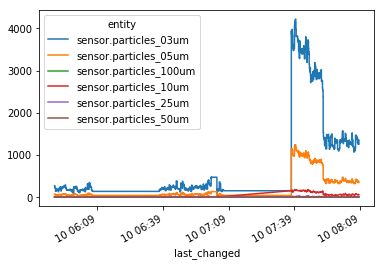

In [15]:
df.plot();